📒 [NB 3-3] 의료 이용 현황 파악 (범주형 분석)
1. 데이터 준비
병원 운영 데이터(진료과, 요일, 성별 등)를 생성한다. 범주형 데이터 분석은 주로 '빈도(Frequency)'와 '비율(Proportion)'을 다룬다.

In [1]:
!pip install pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(999)
n = 1000

# 진료과, 요일 데이터 생성
depts = ['Internal Med', 'Surgery', 'Pediatrics', 'Orthopedics', 'Dermatology']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

data = {
    'Visit_ID': [f'V{i:04d}' for i in range(n)],
    'Dept': np.random.choice(depts, n, p=[0.4, 0.2, 0.15, 0.15, 0.1]), # 내과 비중 높게
    'Day': np.random.choice(days, n),
    'Gender': np.random.choice(['M', 'F'], n),
    'Revisit': np.random.choice(['New', 'Follow-up'], n, p=[0.3, 0.7]) # 재진 비중 높게
}

df = pd.DataFrame(data)

# 요일 순서 정렬을 위한 Categorical Type 변환
df['Day'] = pd.Categorical(df['Day'], categories=days, ordered=True)

print("데이터 미리보기:")
display(df.head())

데이터 미리보기:


,Visit_ID,Dept,Day,Gender,Revisit
0,V0000,Orthopedics,Wed,F,Follow-up
1,V0001,Surgery,Sun,F,New
2,V0002,Internal Med,Wed,F,Follow-up
3,V0003,Pediatrics,Thu,M,Follow-up
4,V0004,Internal Med,Mon,F,Follow-up


2. 빈도 분석 (Bar Chart)
"어떤 진료과에 환자가 가장 많은가?"를 확인한다. countplot은 데이터 개수를 자동으로 세어준다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15208\1730355053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Dept', data=df, order=df['Dept'].value_counts().index, palette='viridis')


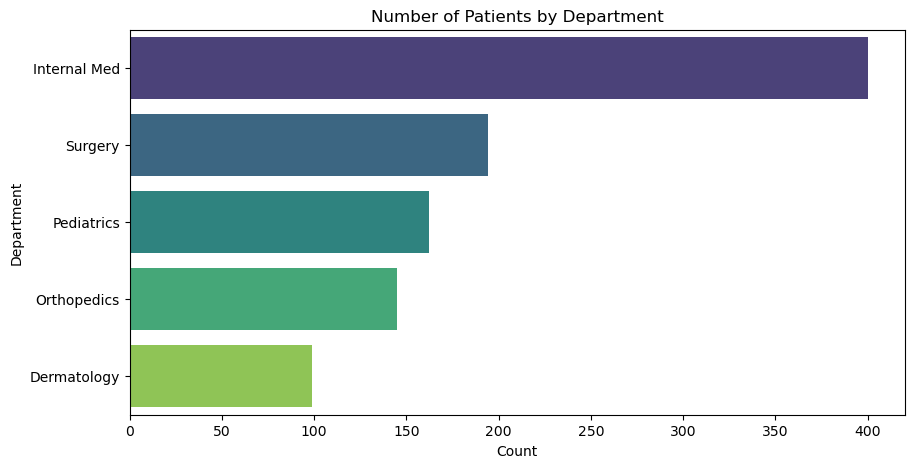

In [2]:
plt.figure(figsize=(10, 5))
# y축에 Dept를 두어 가로 막대형으로 그리면 라벨 읽기가 편하다.
sns.countplot(y='Dept', data=df, order=df['Dept'].value_counts().index, palette='viridis')
plt.title('Number of Patients by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

3. 비율 분석 (Pie Chart)
"신환(New)과 재진(Follow-up) 환자의 비율은 어떠한가?" 전체 대비 비중을 파악한다.

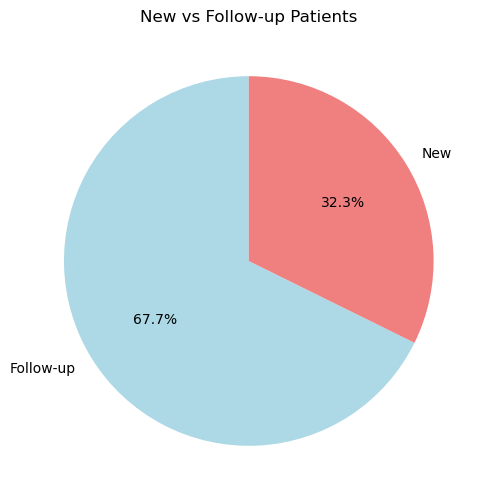

In [3]:
# 값 계산
revisit_counts = df['Revisit'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(revisit_counts, labels=revisit_counts.index, autopct='%.1f%%', 
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('New vs Follow-up Patients')
plt.show()

4. 교차 분석 (Cross Tabulation & Heatmap)
두 범주형 변수의 관계를 본다. "요일별로 붐비는 진료과가 다른가?"

[교차표 데이터]


Day,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Dept,,,,,,,
Dermatology,14,16,12,10,16,15,16
Internal Med,58,67,54,63,46,57,55
Orthopedics,21,20,21,22,23,22,16
Pediatrics,23,19,23,18,29,22,28
Surgery,24,30,34,25,32,29,20


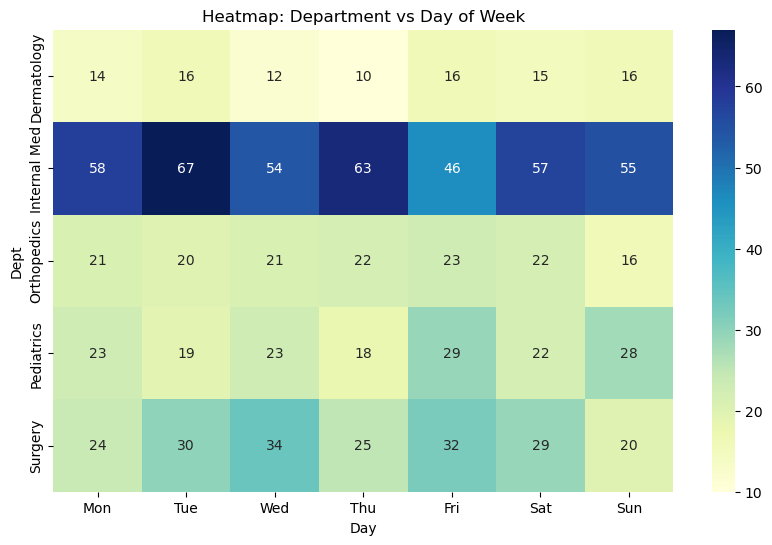

In [4]:
# 1. 교차표(Crosstab) 생성: 행=진료과, 열=요일
ct = pd.crosstab(df['Dept'], df['Day'])

print("[교차표 데이터]")
display(ct)

# 2. 히트맵(Heatmap) 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu') # annot=True: 숫자 표시
plt.title('Heatmap: Department vs Day of Week')
plt.show()

# 해석: 색이 진한 칸이 해당 요일에 해당 진료과 환자가 많다는 뜻이다.